In [8]:
from IPython.display import Latex
from PyFoam.RunDictionary.SolutionDirectory import SolutionDirectory
from PyFoam.RunDictionary.ParsedParameterFile import ParsedParameterFile
from PyFoam.Basics.DataStructures import Vector
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import os,shutil,glob
import pylab, re
import matplotlib.pyplot as plt
from tikzplotlib import save as tikz_save

In [9]:
A = pd.read_csv('/home/andres/Desktop/Drag/newDomain/08310HzCD.csv',header=None,delimiter='\t')
f=10 #Hz

In [10]:
t, Cd, Cl=  A.to_numpy().T
td = t[263:564]
tl = t[241:541]
Cd=Cd[263:564]
Cl=Cl[241:541]
td=(td-2.663)*f
tl=(tl-2.641)*f
fplus=f/13.27 #Hz

In [11]:
Cd.argmax()
nmaxs =  find_peaks(Cd,distance=30)[0]

Cd_m = Cd[nmaxs[0]:nmaxs[-1]].mean()

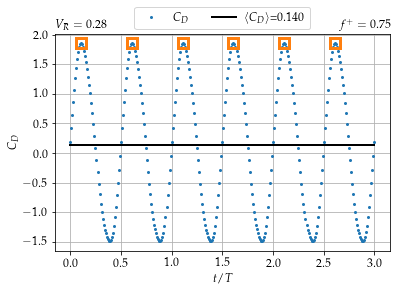

In [12]:
fig,ax = plt.subplots()
plt.rcParams['text.usetex'] = True
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
ax.plot(td,Cd,'o',markersize=2,label='$C_D$')
ax.plot(td[nmaxs],Cd[nmaxs],'s',fillstyle='none',markersize=10,markeredgewidth=3)#,label='Máximo')
ax.plot(td,Cd_m+td*0,color='k',linewidth=2,label=r'$\langle C_D \rangle$'+f'={Cd_m:.3f}')
ax.set_xlabel('$t/T$',size=12)
ax.set_ylabel('$C_D$',size=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_title('$V_R=0.28$',loc='left')
ax.set_title('$f^+={:0.2f}$'.format(fplus),loc='right')
ax.grid()
ax.legend(prop={'size': 11})
plt.legend(bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=2, fontsize=12)
#tikz_save('CD_ref.tikz')
plt.savefig('CD-083ms-10Hz.pdf')
plt.savefig('CD-083ms-10Hz.png')

In [13]:
Cl.argmax()
nmaxs =  find_peaks(Cl,distance=40)[0]
print(nmaxs)
Cl_m = Cl[nmaxs[0]:nmaxs[-1]].mean()

[ 24 124 224]


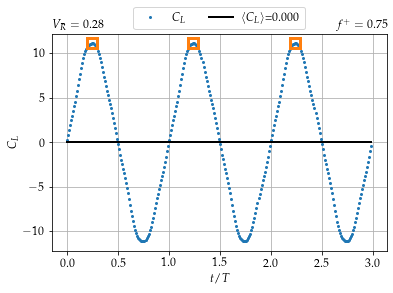

In [14]:
fig,ax = plt.subplots()
plt.rcParams['text.usetex'] = True
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
ax.plot(tl,Cl,'o',markersize=2,label='$C_L$')
ax.plot(tl[nmaxs],Cl[nmaxs],'s',fillstyle='none',markersize=10,markeredgewidth=3)#,label='Máximo')
ax.plot(tl,Cl_m+tl*0,color='k',linewidth=2,label=r'$\langle C_L \rangle$'+f'={Cl_m:.3f}')
ax.set_xlabel('$t/T$',size=12)
ax.set_ylabel('$C_L$',size=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_title('$V_R=0.28$',loc='left')
ax.set_title('$f^+={:0.2f}$'.format(fplus),loc='right')
ax.grid()
ax.legend(prop={'size': 11})
plt.legend(bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=2, fontsize=12)
plt.savefig('CL-083ms-10Hz.pdf')
plt.savefig('CL-083ms-10Hz.png')